# Decision Tree ( Company DataSet ) 

### Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 

Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


# ============================================================= 

# 1.  <u>Data Description : 

## Let’s consider a Company dataset with around 10 variables and 400 records. 

## The attributes are as follows: 

**Sales --** Unit sales (in thousands) at each location

**Competitor Price --** Price charged by competitor at each location

**Income --** Community income level (in thousands of dollars)

**Advertising --** Local advertising budget for company at each location (in thousands of dollars)

**Population --** Population size in region (in thousands)

**Price --** Price company charges for car seats at each site

**Shelf Location at stores --** A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

**Age --** Average age of the local population

**Education --** Education level at each location

**Urban --** A factor with levels No and Yes to indicate whether the store is in an urban or rural location

**US --** A factor with levels No and Yes to indicate whether the store is in the US or not 

# 2. <u> Import Neccesery Libraries -  

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix

# 2. <u>Import Warnings -  

In [106]:
import warnings
warnings.filterwarnings('ignore')

# 3.<u>Import Dataset -  

In [107]:
company_data = pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


# 4. <u> EDA -  

In [108]:
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [109]:
company_data.duplicated().sum()

0

In [110]:
company_data.describe(include='all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


In [111]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# 5. <u> Data Visualization -  

In [112]:
corr = company_data.corr()
corr 

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


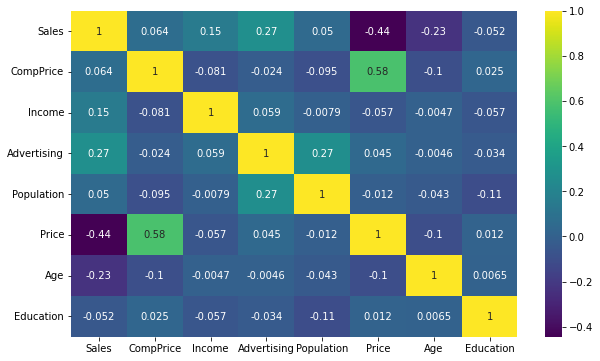

In [113]:
plt.figure(figsize = (10, 6))
sns.heatmap(corr,annot=True, cmap = 'viridis')
plt.show()

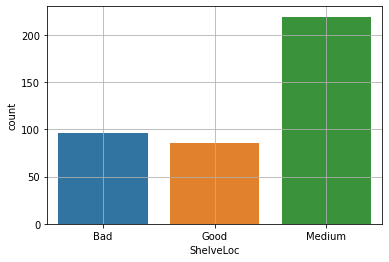

In [114]:
sns.countplot(company_data['ShelveLoc'])
plt.grid(True)
plt.show()

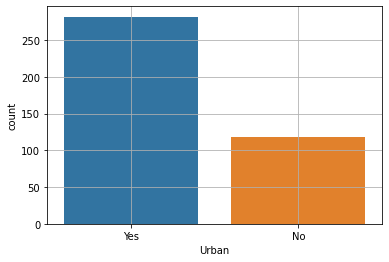

In [115]:
sns.countplot(company_data['Urban'])
plt.grid(True)
plt.show()

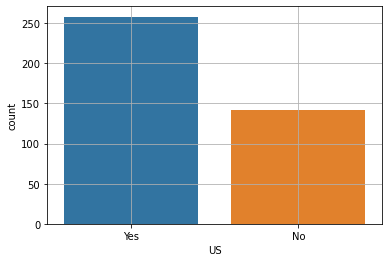

In [116]:
sns.countplot(company_data['US'])
plt.grid(True)
plt.show()

# 6. <u> Data Preparationn - 

## Converting Target variable 'Sales' into categories Low, Medium and High. 

In [117]:
company_data['Sales'].max()

16.27

In [118]:
company_data['Sales'] = pd.cut(x=company_data['Sales'],bins=[0,6,12,17], labels=['Low','Medium', 'High'], right = False)
company_data['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

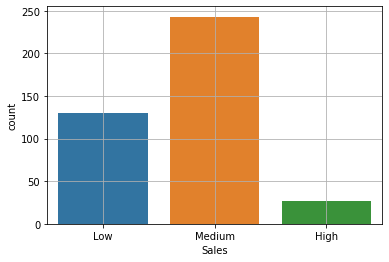

In [119]:
sns.countplot(company_data['Sales'])
plt.grid(True)
plt.show()

In [120]:
company_data['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [121]:
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,138,73,11,276,120,Bad,42,17,Yes,Yes
1,Medium,111,48,16,260,83,Good,65,10,Yes,Yes
2,Medium,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Medium,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Medium,139,23,3,37,120,Medium,55,11,No,Yes
397,Medium,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Low,100,79,7,284,95,Bad,50,12,Yes,Yes


## Encoding categorical company data - 

In [122]:
label_encoder = preprocessing.LabelEncoder()

In [123]:
company_data['Sales'] = label_encoder.fit_transform(company_data['Sales'])
company_data['ShelveLoc'] = label_encoder.fit_transform(company_data['ShelveLoc'])
company_data['Urban'] = label_encoder.fit_transform(company_data['Urban'])
company_data['US'] = label_encoder.fit_transform(company_data['US'])

company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,2,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,2,139,23,3,37,120,2,55,11,0,1
397,2,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


# 7. <u> Model Building -  

In [124]:
X = company_data.drop('Sales', axis = 1)
y = company_data[['Sales']]

In [125]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 42)
print('x_train_shape :',x_train.shape ,'\n y_train_shape :',y_train.shape)

x_train_shape : (268, 10) 
 y_train_shape : (268, 1)


In [126]:
print('x_test_shape :',x_test.shape ,'\n y_test_shape :',y_test.shape)

x_test_shape : (132, 10) 
 y_test_shape : (132, 1)


# 8. <u> Building Decision Tree Classifier using Entropy Criteria - 

In [127]:
model_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth=5)
model_entropy.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

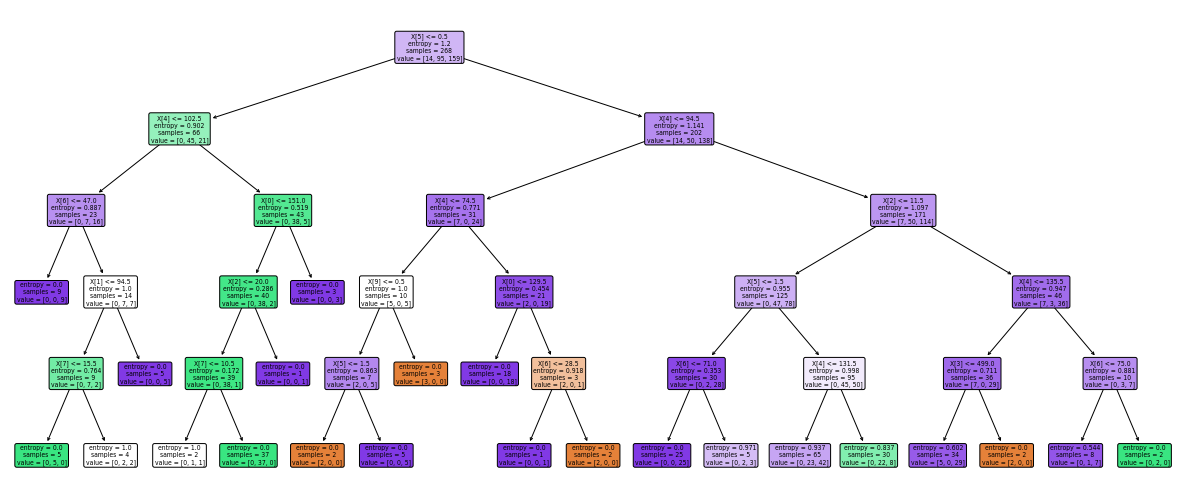

In [128]:
plt.figure(figsize=(21,9))
tree.plot_tree(model_entropy,filled=True, rounded=True)
plt.show()

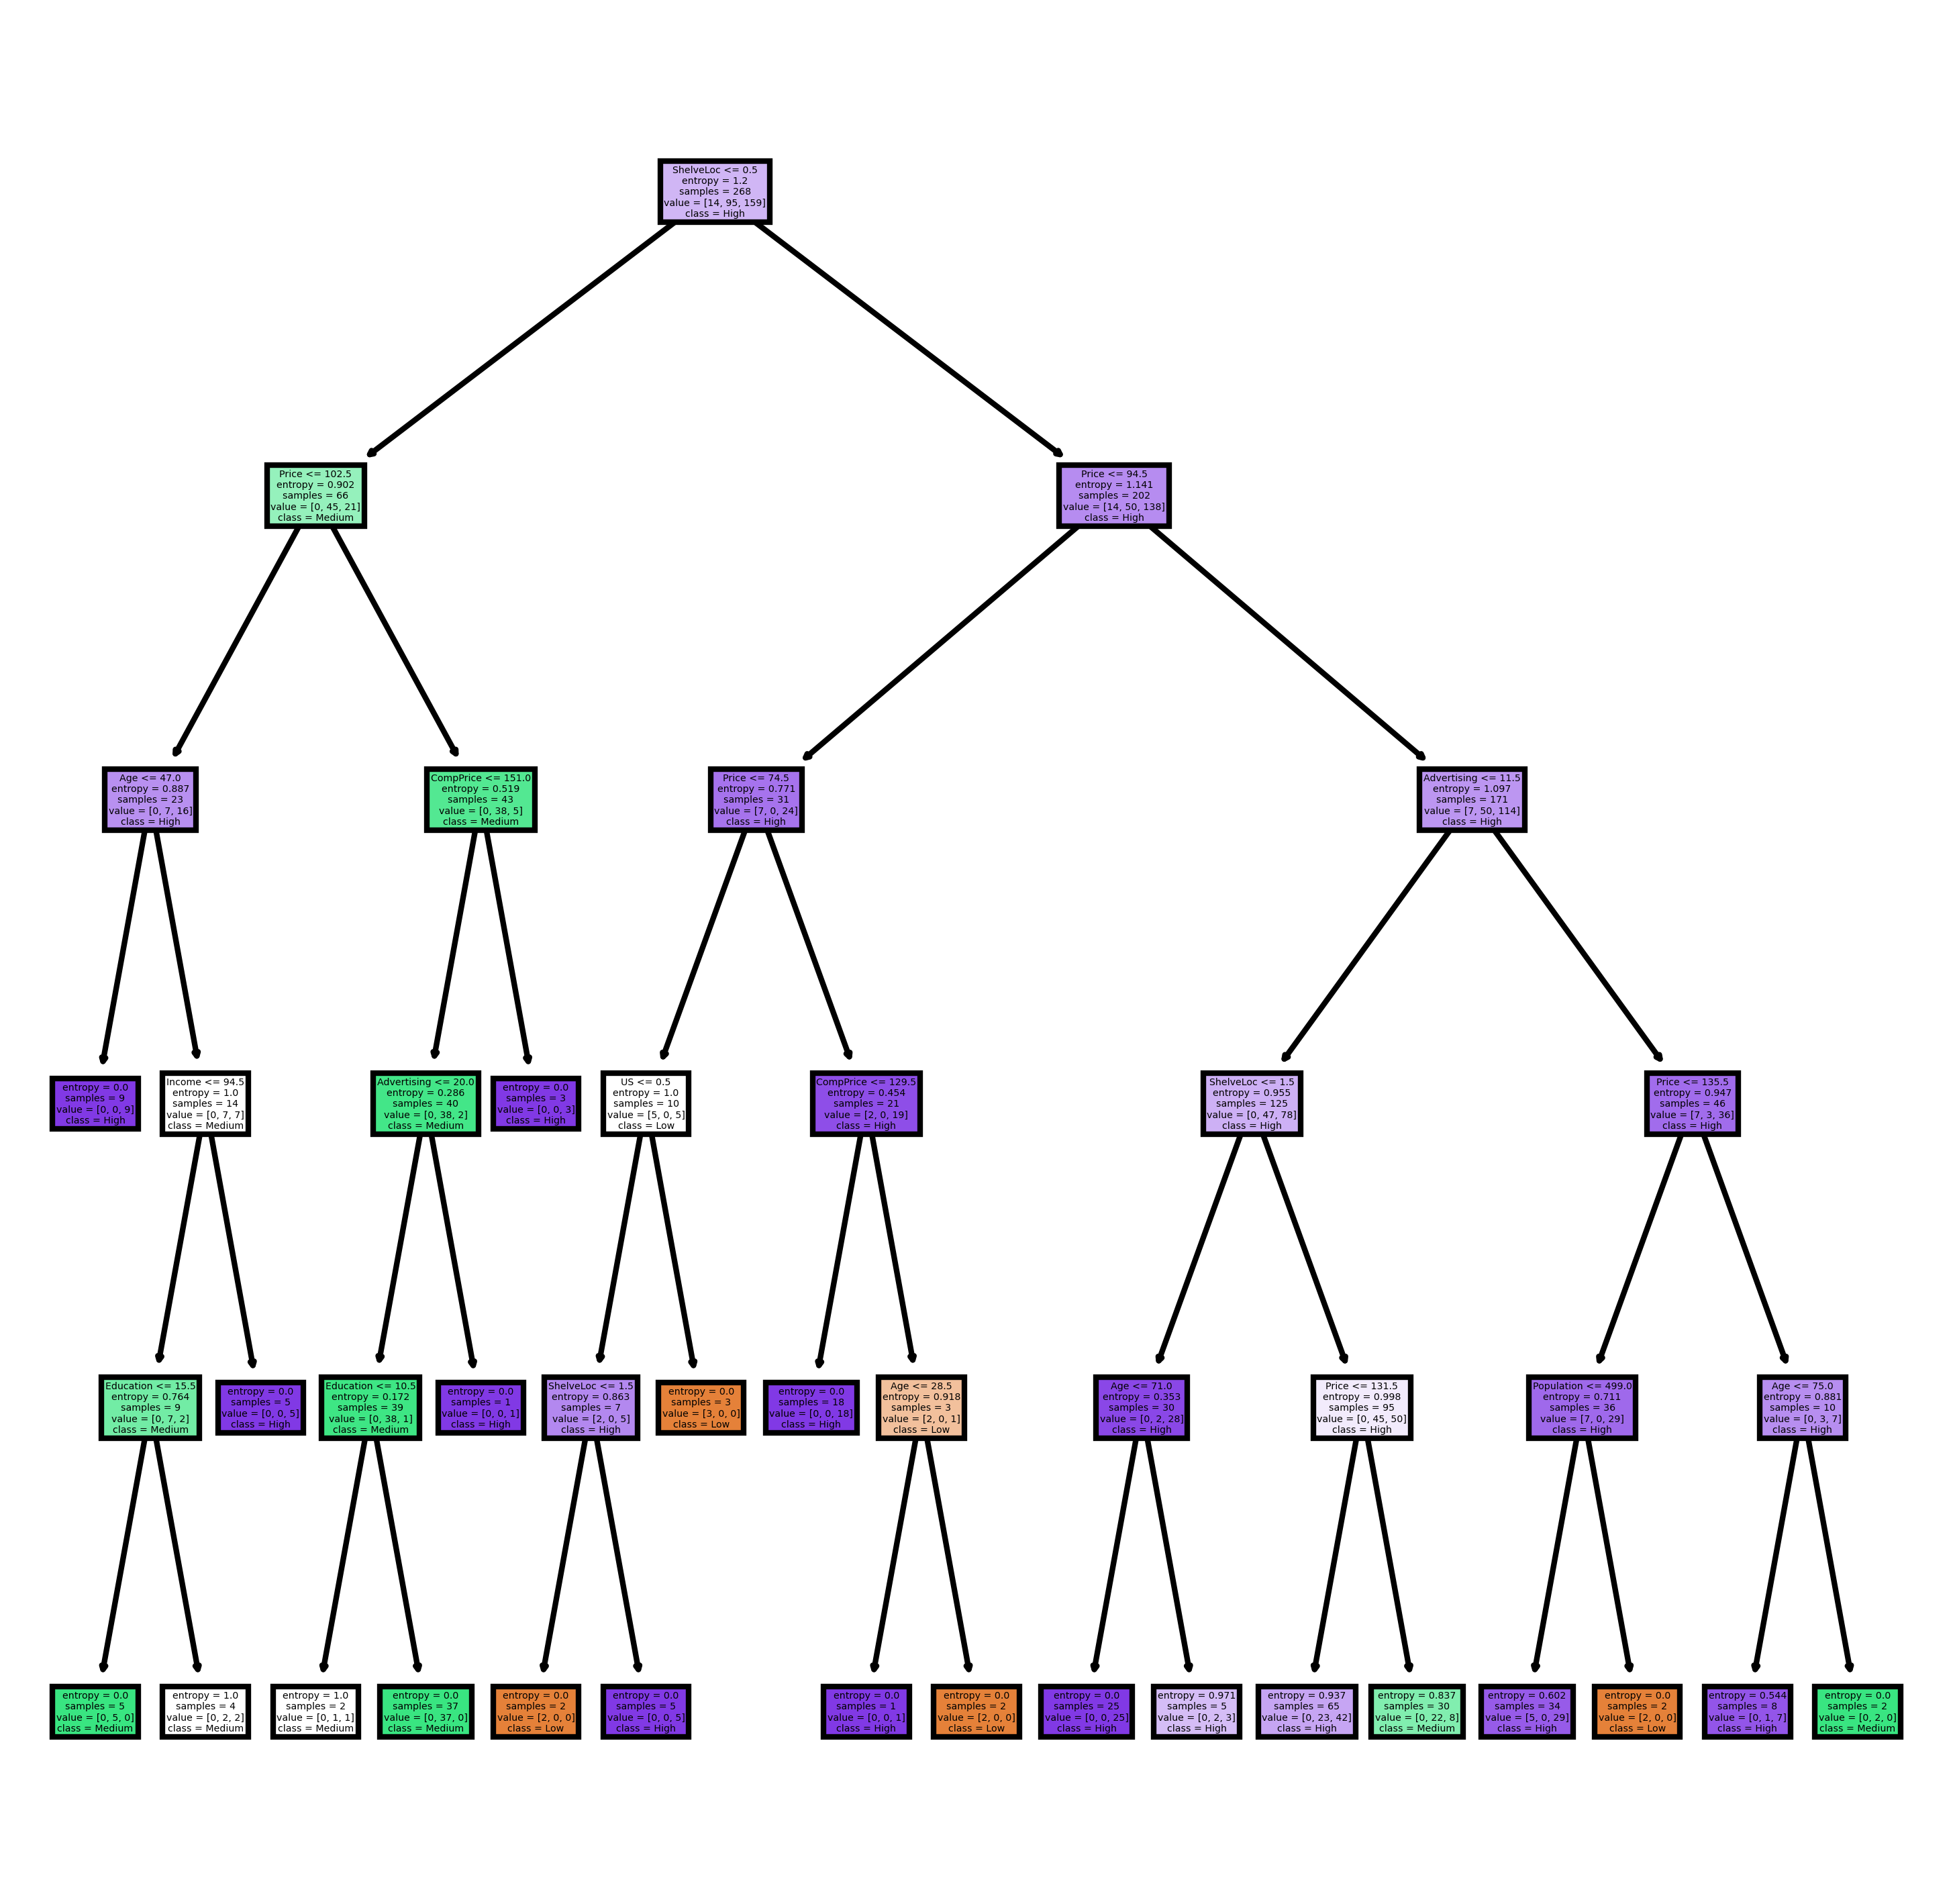

In [129]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_entropy,feature_names = fn, class_names=cn,filled = True)
plt.show()

In [130]:
#prediction train data
pred_train_y = model_entropy.predict(x_train)

In [131]:
# Predicting company_data test data
pred_y_test = model_entropy.predict(x_test)
pred_y_test

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 0,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [132]:
pd.Series(pred_y_test).value_counts()

2    94
1    31
0     7
dtype: int64

In [133]:
# Checking accuracy of model
accuracy_score(y_test,pred_y_test)

0.7121212121212122

In [134]:
confusion_matrix(y_test,pred_y_test)

array([[ 4,  0,  9],
       [ 0, 20, 15],
       [ 3, 11, 70]], dtype=int64)

In [135]:
accuracy_score(y_train,pred_train_y)     #we take max depth=3 , so for train data accuracy is less
                                         # if we do not chose max depth then accuracy score will be 1 for train data

0.8432835820895522

In [136]:
confusion_matrix(y_train,pred_train_y)

array([[  9,   0,   5],
       [  0,  69,  26],
       [  0,  11, 148]], dtype=int64)

# 9. <u> Building Decision Tree Classifier using Gini Criteria - 

In [137]:
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=3)
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

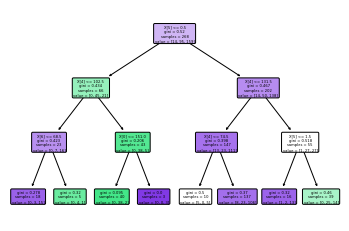

In [138]:
# Plotting Decision tree
tree.plot_tree(model_gini,filled=True, rounded=True)
plt.show()

In [139]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=600)
tree.plot_tree(model_gini,feature_names = fn, class_names=cn,filled = True)
plt.show()

In [140]:
#prediction train data
pred_train_y_gini = model_gini.predict(x_train)

In [141]:
# Predicting company_data by gini 
pred_test_y_gini = model_gini.predict(x_test)
pred_test_y_gini

array([1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 0, 2,
       2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2])

In [142]:
pd.Series(pred_test_y_gini).value_counts()

2    89
1    38
0     5
dtype: int64

In [143]:
# Checking accuracy of model
accuracy_score(y_test,pred_test_y_gini)

0.6893939393939394

In [144]:
confusion_matrix(y_train,pred_train_y_gini)

array([[  5,   0,   9],
       [  0,  67,  28],
       [  5,  17, 137]], dtype=int64)

In [145]:
accuracy_score(y_test,pred_test_y_gini)

0.6893939393939394

In [146]:
accuracy_score(y_test,pred_test_y_gini)

0.6893939393939394

In [147]:
confusion_matrix(y_test,pred_test_y_gini)

array([[ 2,  0, 11],
       [ 0, 23, 12],
       [ 3, 15, 66]], dtype=int64)

# ========================== END ============================= 